In [2]:
import itertools

import numpy as np
import tensorflow as tf
import tensorflow.keras as keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Посмотрим на картиночки

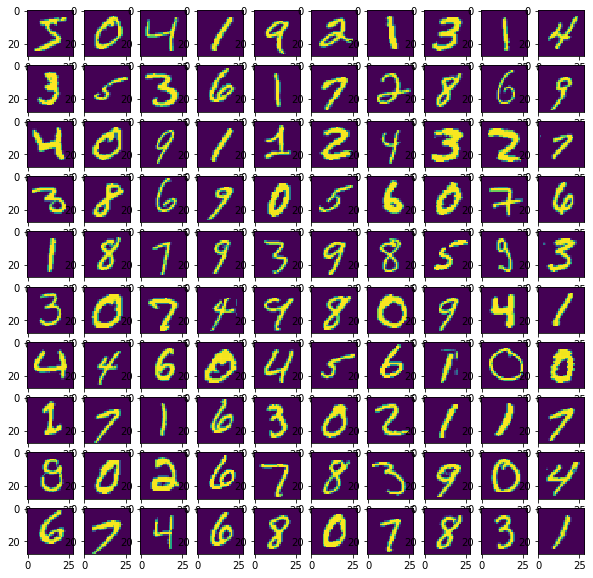

In [4]:
f, axs = plt.subplots(10, 10, figsize=(10, 10))

for num, ax in enumerate(axs.flatten()):
    ax.imshow(x_train[num])

In [5]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## Definition вычислительного графа тут

In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=['accuracy'])

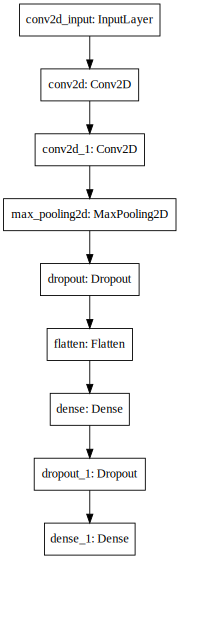

In [7]:
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot

SVG(model_to_dot(model, dpi=64).create(prog='dot', format='svg'))

Архитектура сетки 
1. Посмотрим на первую пару: в операцию conv2d подается начальная картинка (массивом флоатов), conv2d (свертка) работает так https://commons.wikimedia.org/wiki/File:3D_Convolution_Animation.gif?uselang=ru

2. Посмотрим на 3 и 4 операции: выход операции conv2d подается в maxpooling, MaxPoolling работает так: https://computersciencewiki.org/index.php/File:MaxpoolSample2.png

Можно почитать, что такое dropout.
Операция flatten делает из многомерного массива одномерный.

Операция dense применяет матричное умножения к вектору, а к результату матричного умножения применяет некоторую (предопредленную) нелинейную функцию, стандартными выборами являются https://en.wikipedia.org/wiki/Sigmoid_function, https://en.wikipedia.org/wiki/Rectifier_(neural_networks), гиперболический тангенс

Кстати, после conv2d к каждому элементу результата также применяется нелинейность

# Обучение

Скормим модели картинку, на выход получим вектор вероятностей принадлжежности картинки каждому из классов,
видно что необученная модель не отдает предпочтения ни одному из классов

In [8]:
model(x_train[np.newaxis, 0])

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.11099596, 0.09109682, 0.10260568, 0.10528088, 0.10339838,
        0.10230619, 0.10231157, 0.09038873, 0.09769356, 0.09392219]],
      dtype=float32)>

У операций матричного умножения (Dense) и сверток есть какое то количетсво параметров, 
их надо настроить так чтобы модель отдавала правильные предсказания (то есть правильные векторы вероятностей)

Обучение - задача оптимизации в которой мы минизируем некоторую ошибку меняя при этом параметры модели.
Основная фишка нейронок в том что их можно обучать градиентным спуском.

### model.fit - метод для обучения модели

In [9]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 25s 413us/sample - loss: 1.0140 - accuracy: 0.6839 - val_loss: 0.2973 - val_accuracy: 0.9155
Epoch 2/12
60000/60000 [==============================] - 24s 408us/sample - loss: 0.4191 - accuracy: 0.8718 - val_loss: 0.2207 - val_accuracy: 0.9367
Epoch 3/12
60000/60000 [==============================] - 24s 408us/sample - loss: 0.3489 - accuracy: 0.8935 - val_loss: 0.1911 - val_accuracy: 0.9441
Epoch 4/12
60000/60000 [==============================] - 24s 407us/sample - loss: 0.3092 - accuracy: 0.9060 - val_loss: 0.1700 - val_accuracy: 0.9503
Epoch 5/12
60000/60000 [==============================] - 24s 407us/sample - loss: 0.2849 - accuracy: 0.9138 - val_loss: 0.1538 - val_accuracy: 0.9546
Epoch 6/12
60000/60000 [==============================] - 24s 406us/sample - loss: 0.2612 - accuracy: 0.9219 - val_loss: 0.1428 - val_accuracy: 0.9581
Epoch 7/12
60000/60000 [====================

Получили точность на отложенный выборке картинок 0.9702, не айс но и не так плохо